# 1day late (Total 1 grace days used till now)

# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report, log_loss, accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import variation
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, silhouette_score, calinski_harabasz_score
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from scipy.spatial.distance import hamming

## 1.Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from:https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the datarandomly as the training set.

In [2]:
df = pd.read_csv('../data/HW7/Frogs_MFCCs.csv',header=None)
df.columns = df.iloc[0,:]
df = df.iloc[1:,:]
X = df.iloc[:,:-4]
y = df.iloc[:,-4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
1,1,0.152936298220384,-0.105585902844019,0.200721914808566,0.317201062343259,0.260763853131077,0.100944640810053,-0.150062604917616,-0.17112763198601,0.124676436148438,...,-0.108351107221198,-0.0776225214037558,-0.00956780151914234,0.0576839754007957,0.118680135068692,0.0140384456733697,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1,0.171534257314109,-0.0989747371205295,0.268425220827017,0.338671862995453,0.268353099863332,0.0608350871920449,-0.222474640379244,-0.207692670568256,0.170882873543032,...,-0.0909740108032878,-0.0565095219192882,-0.035303356812479,0.0201399631478018,0.0822629868835422,0.0290557421631693,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1,0.152317085189856,-0.0829726738725973,0.287127957306532,0.276014083988895,0.189866772581424,0.00871395674901959,-0.242234230697363,-0.219153324384574,0.232538316574083,...,-0.0506914300740697,-0.0235902291809596,-0.0667215489148675,-0.0250832267732169,0.0991083997463254,0.0771623846958952,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1,0.22439244572155,0.118984663992927,0.329431728991851,0.37208800967925,0.36100456768708,0.0155010402636969,-0.1943474518771,-0.0981806677778217,0.270375424774079,...,-0.13600940404278,-0.177037008525031,-0.130498132704666,-0.0547663962602304,-0.018691446529289,0.0239543085482256,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1,0.0878169091598283,-0.0683448878848087,0.306966720688553,0.330922940689476,0.249143914245263,0.00688371297114425,-0.265423361986448,-0.172699811727761,0.266434260043502,...,-0.0488846180288039,-0.0530735072212773,-0.0885504031444007,-0.0313455727580116,0.108609831720118,0.0792443322969332,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,1,-0.554504037019607,-0.337716710841535,0.0355334590503803,0.0345113239782944,0.443451112524509,0.0938887716651172,-0.100752524801833,0.0370870409878104,0.0810745899840643,...,0.0694299004738766,0.0710013794763056,0.0215908329852933,0.0524494375476657,-0.0218602972882912,-0.0798599600215864,Hylidae,Scinax,ScinaxRuber,60
7192,1,-0.517273069203967,-0.370573645418433,0.0306731954922253,0.0680969662108772,0.402889595613644,0.0966278967218619,-0.116460354438292,0.0637271295679076,0.089033920122507,...,0.0611271326639018,0.0689779189822318,0.0177454313788708,0.0464613822408519,-0.0154184947738101,-0.101892211308697,Hylidae,Scinax,ScinaxRuber,60
7193,1,-0.582556780749031,-0.343237394473775,0.0294678468365923,0.0641794634592213,0.385595605243547,0.114905286180925,-0.103316768772006,0.0703695007921672,0.0813167612414816,...,0.0824741587492605,0.0777707150754516,-0.00968774072684392,0.02783380016501,-0.000530614769783166,-0.0804253341452265,Hylidae,Scinax,ScinaxRuber,60
7194,1,-0.519497158109369,-0.307553060247487,-0.00492150002198673,0.0728653903055556,0.377130684416003,0.0868664413388795,-0.115798874283736,0.0569789862717624,0.0893161330791891,...,0.0517962820264286,0.0690729803918495,0.0179634517413727,0.0418033791178886,-0.0279113833801593,-0.0968953697801283,Hylidae,Scinax,ScinaxRuber,60


In [4]:
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2005,1,0.327476265873317,0.282440256664465,0.572210985863481,0.0965092960522047,-0.0367054575097741,-0.0821744452694107,0.146603899150052,0.297338485223391,-0.120901611225698,...,0.438531813395321,-0.148450679071846,-0.26037499311613,0.1786283369694,0.218024068661266,-0.0420826467646708,-0.12651071441739,-0.0902792824007261,0.0961759986036933,0.191696974853021
1195,1,0.232818129364458,-0.144330872846686,-0.0789089526628874,-0.0724665102552634,0.255379650121681,0.450214966599411,0.261032591910444,-0.168462427624664,-0.281445109809977,...,-0.108483301736954,0.329983939153951,0.274031459627288,-0.157578705106687,-0.291978769924574,-0.0429324175339271,-0.00902091159443213,-0.0326788353695057,0.0239115398004088,0.0414065000169413
5360,0.966442625480914,0.455913508165857,1,0.54165047387815,-0.412873011217818,0.307099109007868,0.23581887693276,-0.0640252100921678,0.0697280187189367,-0.0525519170413106,...,-0.0730500855892921,-0.140994275593224,0.162584423029496,-0.00798074757941345,-0.0494281885454635,-0.0531660689585631,-0.026728008238933,0.0294433264651287,0.0190320843686946,-0.105221029922917
1757,1,0.25787292128366,0.11280670922632,0.527614121593643,0.186093925030026,0.043682987639597,-0.163682275185142,-0.0141253344057994,0.196527236933957,0.0188389696595245,...,0.404813412703075,-0.0754883911851319,-0.320882262508249,0.0248061503090598,0.226971496628879,0.0349693667710955,-0.106028533855109,-0.147124210542149,0.0426266759928239,0.250248607443057
498,1,0.401858989182936,0.56321879777146,0.57830427696577,-0.126516948651766,-0.0587245534389107,0.431805653419439,0.066801114095023,-0.321013605702834,0.15556919188141,...,-0.132243575414644,0.190752565760008,0.126674342090162,-0.148049434979877,-0.00289100225413234,0.157071992767642,-0.0152508881079394,-0.0554275647102876,0.086926864040757,0.0860057165170647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,1,0.406366168988548,0.268684360959691,0.704863409553911,0.358415365556103,0.0553759145854193,-0.15981166175214,0.0658130632630291,0.345068147487767,0.175460229487822,...,0.37849742099853,-0.0140911022481287,-0.352984929067729,0.0151825896559356,0.220504031326485,0.0542461688855944,-0.0691084396957279,-0.174582517173578,-0.0322015012036506,0.188262989588786
5192,1,0.634336773200747,0.59439542583912,0.40327097860254,0.00495978205101825,0.0378798237966445,-0.0653994466086458,0.125276024902425,0.106975553662694,-0.223356854415039,...,-0.228140172354549,-0.274888569700778,0.24497281332813,0.0961304941490928,-0.140923070324517,0.00364599702287578,0.00716336504431834,0.068718430976665,0.0476400412140896,-0.179214871625482
5227,1,0.756412840785842,0.732319226891429,0.385806680424688,-0.0348210204283667,0.0738807314425853,-0.0580274987066014,0.183775114053138,0.219418866469536,-0.445111787339728,...,-0.177708120948575,-0.311815333357249,0.182382403287644,0.030100031778406,-0.182018923268169,0.00629594509115906,-0.00586782403601627,0.0294388852405923,0.00478316581662461,-0.198014034928416
5391,0.931409652874362,0.626136591358876,1,0.375834149432018,-0.22304358440191,0.325942899786494,0.121658774649239,-0.0925424885449889,0.16336549538301,-0.0493818972535241,...,-0.0476104944880401,-0.188462639754653,0.102239712925169,0.150352782447734,-0.0547498806828862,-0.0544338620269883,0.108092032295646,0.156993947531814,-0.051680624148571,-0.0856561183128213


In [5]:
y_train

,Family,Genus,Species,RecordID
2005,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1195,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5360,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1757,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
498,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...
3773,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5192,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5227,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5391,Hylidae,Hypsiboas,HypsiboasCinerascens,37


### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Reference:- https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

Exact Match Ratio:- It ignores partially correct lables and treats them as incorrectly classified data points.

Hamming score:- It reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples.

####  ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. 1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [8]:
parameters = {'C':[0.01, 0.1, 1, 1.5,2],'gamma': [0.001, 0.01, 0.1, 1,1.5,2,10]}

svc = SVC(kernel='rbf')
gridSvc = GridSearchCV(svc, parameters, cv=10)

In [9]:
# For Raw Attributes
results = []

for feature in y_train.columns:
    gridSvc.fit(X_train, y_train[feature])
    
    best_C = gridSvc.best_params_['C']
    best_gamma = gridSvc.best_params_['gamma']
    crossval_score = gridSvc.best_score_
    
    y_pred = gridSvc.predict(X_test)
    
    hammingLoss = hamming_loss(y_test[feature],y_pred)
    exactMatchScore = accuracy_score(y_test[feature], y_pred)
    
    results.append({"ferature": feature, "Best_C": best_C, "Best_Gamma": best_gamma,"Best_CrossValScore": crossval_score, "Hamming_Loss" : hammingLoss, "Exact_Match_Score": exactMatchScore})

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [10]:
results = pd.DataFrame(results)
results

,ferature,Best_C,Best_Gamma,Best_CrossValScore,Hamming_Loss,Exact_Match_Score
0,Family,2.0,2,0.992853,0.010190,0.989810
1,Genus,1.5,2,0.990467,0.013432,0.986568
2,Species,1.5,2,0.989475,0.012043,0.987957
3,RecordID,2.0,10,0.878074,0.110699,0.889301


In [11]:
# Using Standardized attributes

scaler = StandardScaler()

scaler = scaler.fit(X_train)

X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

results = []

for feature in y_train.columns:
    gridSvc.fit(X_train_standardized, y_train[feature])
    
    best_C = gridSvc.best_params_['C']
    best_gamma = gridSvc.best_params_['gamma']
    crossval_score = gridSvc.best_score_
    
    y_pred = gridSvc.predict(X_test_standardized)
    
    hammingLoss = hamming_loss(y_test[feature],y_pred)
    exactMatchScore = accuracy_score(y_test[feature], y_pred)
    
    results.append({"ferature": feature, "Best_C": best_C, "Best_Gamma": best_gamma,"Best_CrossValScore": crossval_score, "Hamming_Loss" : hammingLoss, "Exact_Match_Score": exactMatchScore})


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [12]:
results = pd.DataFrame(results)
results

,ferature,Best_C,Best_Gamma,Best_CrossValScore,Hamming_Loss,Exact_Match_Score
0,Family,2,0.1,0.991065,0.008337,0.991663
1,Genus,2,0.1,0.988085,0.012506,0.987494
2,Species,2,0.1,0.984312,0.016211,0.983789
3,RecordID,2,0.1,0.879865,0.109773,0.890227


#### iii. Repeat 1(b)ii with L 1 -penalized SVMs. 3 Remember to standardize 4 the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [13]:
parameters = {'C':[0.01, 0.1, 1, 1.5,2]}
L1_SVM = LinearSVC(penalty='l1',multi_class='ovr',dual=False, tol=1e-5,max_iter = 10000)
gridSVM = GridSearchCV(L1_SVM, parameters, cv =10)

In [14]:
results = []

for feature in y_train.columns:
    gridSVM.fit(X_train_standardized, y_train[feature])
    
    best_C = gridSVM.best_params_['C']
    crossval_score = gridSVM.best_score_
    
    y_pred = gridSVM.predict(X_test_standardized)
    
    hammingLoss = hamming_loss(y_test[feature],y_pred)
    exactMatchScore = accuracy_score(y_test[feature], y_pred)
    
    results.append({"ferature": feature, "Best_C": best_C,"Best_CrossValScore": crossval_score, "Hamming_Loss" : hammingLoss, "Exact_Match_Score": exactMatchScore})

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number

In [15]:
results = pd.DataFrame(results)
results

,ferature,Best_C,Best_CrossValScore,Hamming_Loss,Exact_Match_Score
0,Family,1.5,0.940827,0.071329,0.928671
1,Genus,2.0,0.951947,0.057897,0.942103
2,Species,1.5,0.960484,0.041223,0.958777
3,RecordID,2.0,0.779383,0.223715,0.776285


#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [28]:
parameters = {'classification__C': [0.01, 0.1, 1, 1.5,2]}
results = []
features = ["Family","Genus","Species"]

for feature in features:
    L1_SVM = LinearSVC(penalty='l1', dual = False, max_iter = 10000)


    model = Pipeline([
            ('sampling', SMOTE()),
            ('classification', L1_SVM)
        ])
    gridSVM = GridSearchCV(model, parameters, cv =10)
    gridSVM = gridSVM.fit(X_train_standardized, y_train[feature])

    best_C = gridSVM.best_params_['classification__C']
    crossval_score = gridSVM.best_score_

    y_pred = gridSVM.predict(X_test_standardized)

    hammingLoss = hamming_loss(y_test[feature],y_pred)
    exactMatchScore = accuracy_score(y_test[feature], y_pred)

    results.append({"ferature": feature, "Best_C": best_C,"Best_CrossValScore": crossval_score, "Hamming_Loss" : hammingLoss, "Exact_Match_Score": exactMatchScore})

In [29]:
results = pd.DataFrame(results)
results

,ferature,Best_C,Best_CrossValScore,Hamming_Loss,Exact_Match_Score
0,Family,1.5,0.921767,0.089856,0.910144
1,Genus,1.0,0.913624,0.097267,0.902733
2,Species,2.0,0.957108,0.040760,0.959240


Conclusions:

1) Hamming loss for family and species are less for standardized attributes as compared to raw attributes 
2) Exact match score for both standardized and raw attributes are nearly same
3) Hamming loss increases for the L1 penalized model where as the exact match score decreases as compared to the simple kernal SVM
4) Performing smote further increases the Hamming loss and there is significant decrease in the exact match score as compared to the previous model.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

#### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
#### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
#### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss 5 between the true labels and the labels assigned by clusters.

In [56]:
warnings.filterwarnings(action='ignore')
k_values = [i for i in range(1,51)]
hamming_distances = []

for i in range(0,50):
    print(i," : simulation")
    labels_for_each_K = []
    silhouettes_score_for_each_K = []
    best_k = 0
    max_score = -1
    for k in range(2,51):
        Kmeans_model = KMeans(n_clusters=k)
        Kmeans_model.fit(X)
        
        silhouettes_score = silhouette_score(X, Kmeans_model.labels_)
        silhouettes_score_for_each_K.append(silhouettes_score)
        if(silhouettes_score > max_score):
            best_k = k
            max_score = silhouettes_score
    best_Kmeans_model = KMeans(n_clusters = best_k) 
    best_Kmeans_model.fit(X)
    
    print("The Best K is: ",best_k)
    
    best_labels = best_Kmeans_model.labels_
    
    df_temp = pd.DataFrame()
    df_temp['best_labels'] = best_labels
    
    df_temp['Family'] = df["Family"]
    df_temp['Genus'] = df["Genus"]
    df_temp['Species'] = df["Species"]
    
#     print(df_temp)
    
    family_majority_votes = {}
    genus_majority_votes = {}
    species_majority_votes = {}
    
    family_votes = df_temp.groupby(['best_labels'])['Family'].value_counts()
    genus_votes = df_temp.groupby(['best_labels'])['Genus'].value_counts()
    species_votes = df_temp.groupby(['best_labels'])['Species'].value_counts()
#     print(family_votes)
    
    for j in range(best_k):
        family_majority_votes[j] = family_votes[j].idxmax()
        genus_majority_votes[j] = genus_votes[j].idxmax()
        species_majority_votes[j] = species_votes[j].idxmax()
    

    print("Family majority",family_majority_votes)
    print("Genus majority", genus_majority_votes)
    print("Species majority",species_majority_votes)
    
    predictions_family = []
    prediction_genus = []
    prefictions_species = []
    
    for i, row in df_temp.iterrows():
        predictions_family.append(family_majority_votes[row['best_labels']])
        prediction_genus.append(genus_majority_votes[row['best_labels']])
        prefictions_species.append(species_majority_votes[row['best_labels']])
        
    df_temp['predictions_family'] = predictions_family
    df_temp['prediction_genus'] = prediction_genus
    df_temp['prefictions_species'] = prefictions_species
    
    df_temp = df_temp.dropna()
    
    family_hamming_loss = hamming_loss(df_temp['Family'], df_temp['predictions_family'])
    genus_hamming_loss = hamming_loss(df_temp['Genus'], df_temp['prediction_genus'])
    species_hamming_loss = hamming_loss(df_temp['Species'], df_temp['prefictions_species'])
    
    
    average_hamming_loss = (family_hamming_loss + genus_hamming_loss + species_hamming_loss) / 3
    
    print('Average Hamming Loss : ', average_hamming_loss)
    
    family_hamming_score = accuracy_score(df_temp['Family'], df_temp['predictions_family'])
    genus_hamming_score = accuracy_score(df_temp['Genus'], df_temp['prediction_genus'])
    species_hamming_score = accuracy_score(df_temp['Species'], df_temp['prefictions_species'])
    
    
    average_hamming_score = (family_hamming_score + genus_hamming_score + species_hamming_score) / 3
    
    print('Average Hamming Score: ', average_hamming_score)
    
    family_hamming_distance = hamming(df_temp['Family'], df_temp['predictions_family'])
    genus_hamming_distance = hamming(df_temp['Genus'], df_temp['prediction_genus'])
    species_hamming_distance = hamming(df_temp['Species'], df_temp['prefictions_species'])
    
    
    average_hamming_distance = (family_hamming_distance + genus_hamming_distance + species_hamming_distance) / 3
    
    print('Average Hamming Distance : ', average_hamming_distance) 
    hamming_distances.append(average_hamming_distance)

0  : simulation
The Best K is:  4
Family majority {0: 'Dendrobatidae', 1: 'Leptodactylidae', 2: 'Hylidae', 3: 'Hylidae'}
Genus majority {0: 'Ameerega', 1: 'Adenomera', 2: 'Hypsiboas', 3: 'Hypsiboas'}
Species majority {0: 'Ameeregatrivittata', 1: 'AdenomeraHylaedactylus', 2: 'HypsiboasCordobae', 3: 'HypsiboasCinerascens'}
Average Hamming Loss :  0.22268557130942454
Average Hamming Score:  0.7773144286905754
Average Hamming Distance :  0.22268557130942454
1  : simulation
The Best K is:  4
Family majority {0: 'Hylidae', 1: 'Leptodactylidae', 2: 'Dendrobatidae', 3: 'Hylidae'}
Genus majority {0: 'Hypsiboas', 1: 'Adenomera', 2: 'Ameerega', 3: 'Hypsiboas'}
Species majority {0: 'HypsiboasCinerascens', 1: 'AdenomeraHylaedactylus', 2: 'Ameeregatrivittata', 3: 'HypsiboasCordobae'}
Average Hamming Loss :  0.22268557130942454
Average Hamming Score:  0.7773144286905754
Average Hamming Distance :  0.22268557130942454
2  : simulation
The Best K is:  4
Family majority {0: 'Leptodactylidae', 1: 'Hylidae

The Best K is:  4
Family majority {0: 'Leptodactylidae', 1: 'Hylidae', 2: 'Hylidae', 3: 'Leptodactylidae'}
Genus majority {0: 'Adenomera', 1: 'Hypsiboas', 2: 'Hypsiboas', 3: 'Adenomera'}
Species majority {0: 'AdenomeraAndre', 1: 'HypsiboasCordobae', 2: 'HypsiboasCordobae', 3: 'AdenomeraHylaedactylus'}
Average Hamming Loss :  0.24543601149105734
Average Hamming Score:  0.7545639885089427
Average Hamming Distance :  0.24543601149105734
19  : simulation
The Best K is:  4
Family majority {0: 'Dendrobatidae', 1: 'Leptodactylidae', 2: 'Hylidae', 3: 'Hylidae'}
Genus majority {0: 'Ameerega', 1: 'Adenomera', 2: 'Hypsiboas', 3: 'Hypsiboas'}
Species majority {0: 'Ameeregatrivittata', 1: 'AdenomeraHylaedactylus', 2: 'HypsiboasCinerascens', 3: 'HypsiboasCordobae'}
Average Hamming Loss :  0.22268557130942454
Average Hamming Score:  0.7773144286905754
Average Hamming Distance :  0.22268557130942454
20  : simulation
The Best K is:  4
Family majority {0: 'Leptodactylidae', 1: 'Hylidae', 2: 'Hylidae', 3

The Best K is:  4
Family majority {0: 'Leptodactylidae', 1: 'Hylidae', 2: 'Dendrobatidae', 3: 'Hylidae'}
Genus majority {0: 'Adenomera', 1: 'Hypsiboas', 2: 'Ameerega', 3: 'Hypsiboas'}
Species majority {0: 'AdenomeraHylaedactylus', 1: 'HypsiboasCordobae', 2: 'Ameeregatrivittata', 3: 'HypsiboasCinerascens'}
Average Hamming Loss :  0.22273190621814476
Average Hamming Score:  0.7772680937818551
Average Hamming Distance :  0.22273190621814476
37  : simulation
The Best K is:  4
Family majority {0: 'Hylidae', 1: 'Leptodactylidae', 2: 'Dendrobatidae', 3: 'Hylidae'}
Genus majority {0: 'Hypsiboas', 1: 'Adenomera', 2: 'Ameerega', 3: 'Hypsiboas'}
Species majority {0: 'HypsiboasCordobae', 1: 'AdenomeraHylaedactylus', 2: 'Ameeregatrivittata', 3: 'HypsiboasCinerascens'}
Average Hamming Loss :  0.22268557130942454
Average Hamming Score:  0.7773144286905754
Average Hamming Distance :  0.22268557130942454
38  : simulation
The Best K is:  4
Family majority {0: 'Hylidae', 1: 'Hylidae', 2: 'Leptodactylidae

In [60]:
# Average Hamming Distance
avg_hamming_dist = np.average(hamming_distances)
print(avg_hamming_dist)

0.22333611342785656


In [62]:
# Standard Devidation
std_hamming = np.std(hamming_distances)
print(std_hamming)

0.003554234359419166


## 3.ISLR 12.6.2

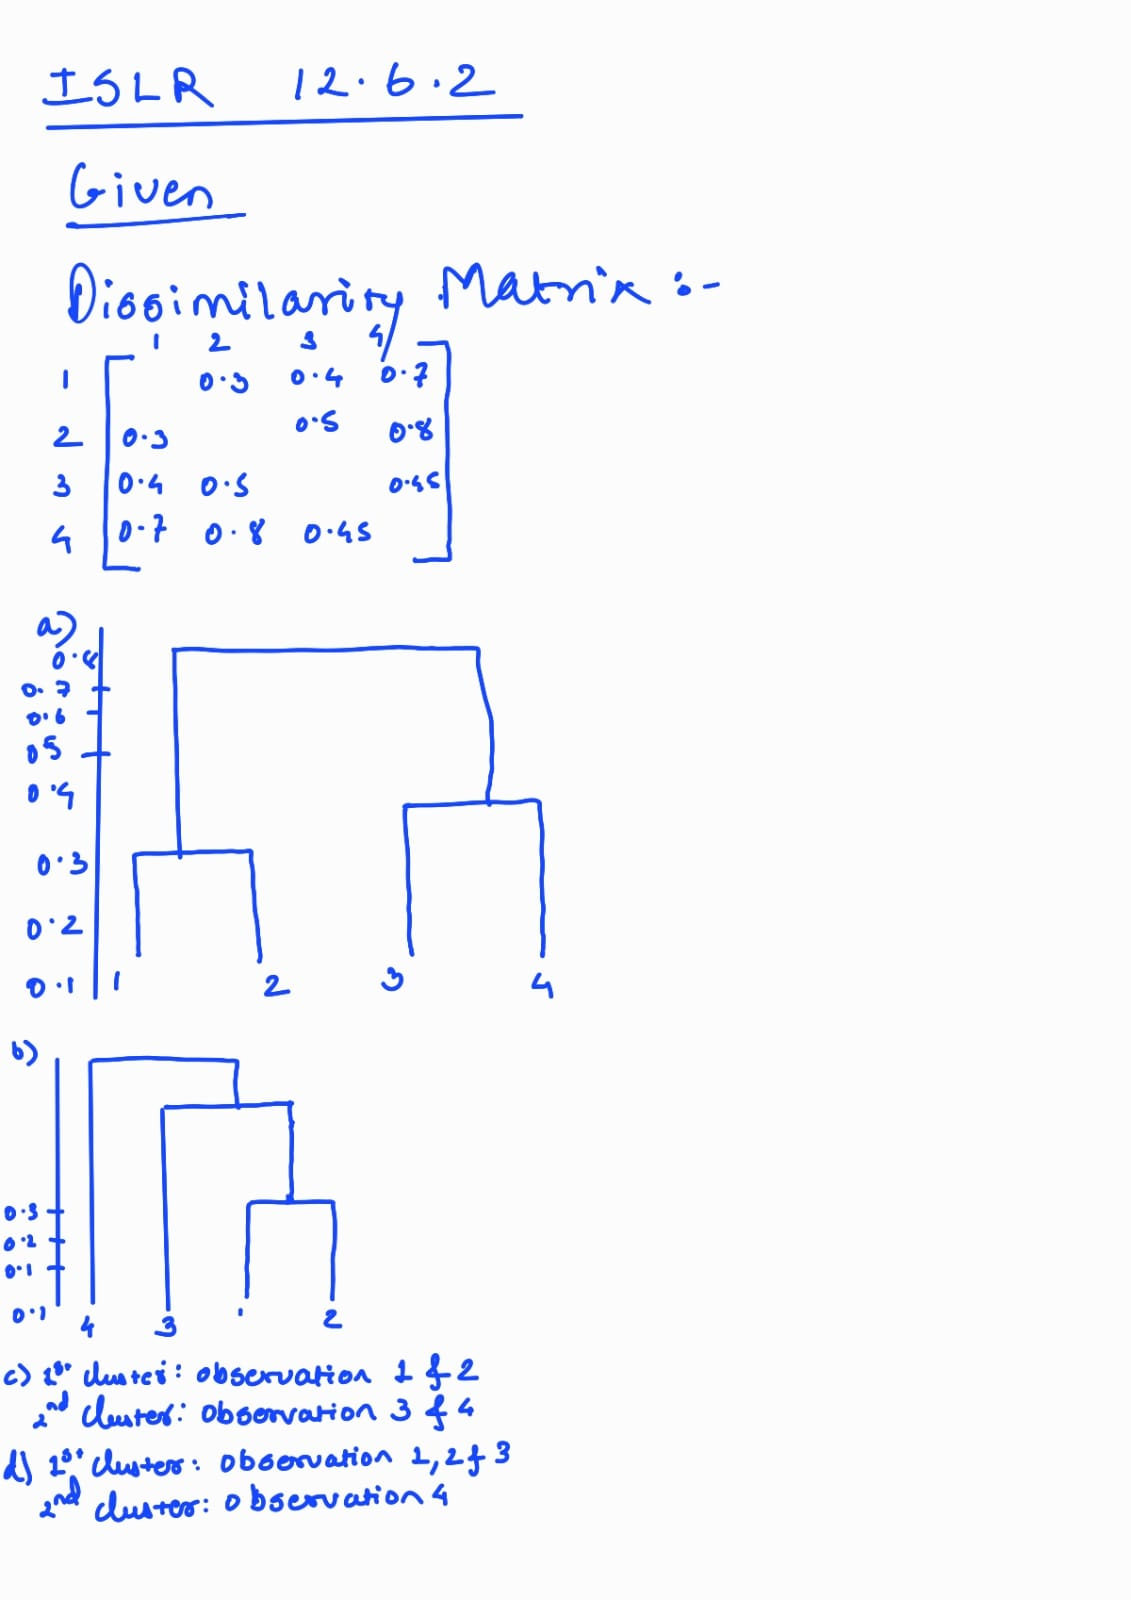

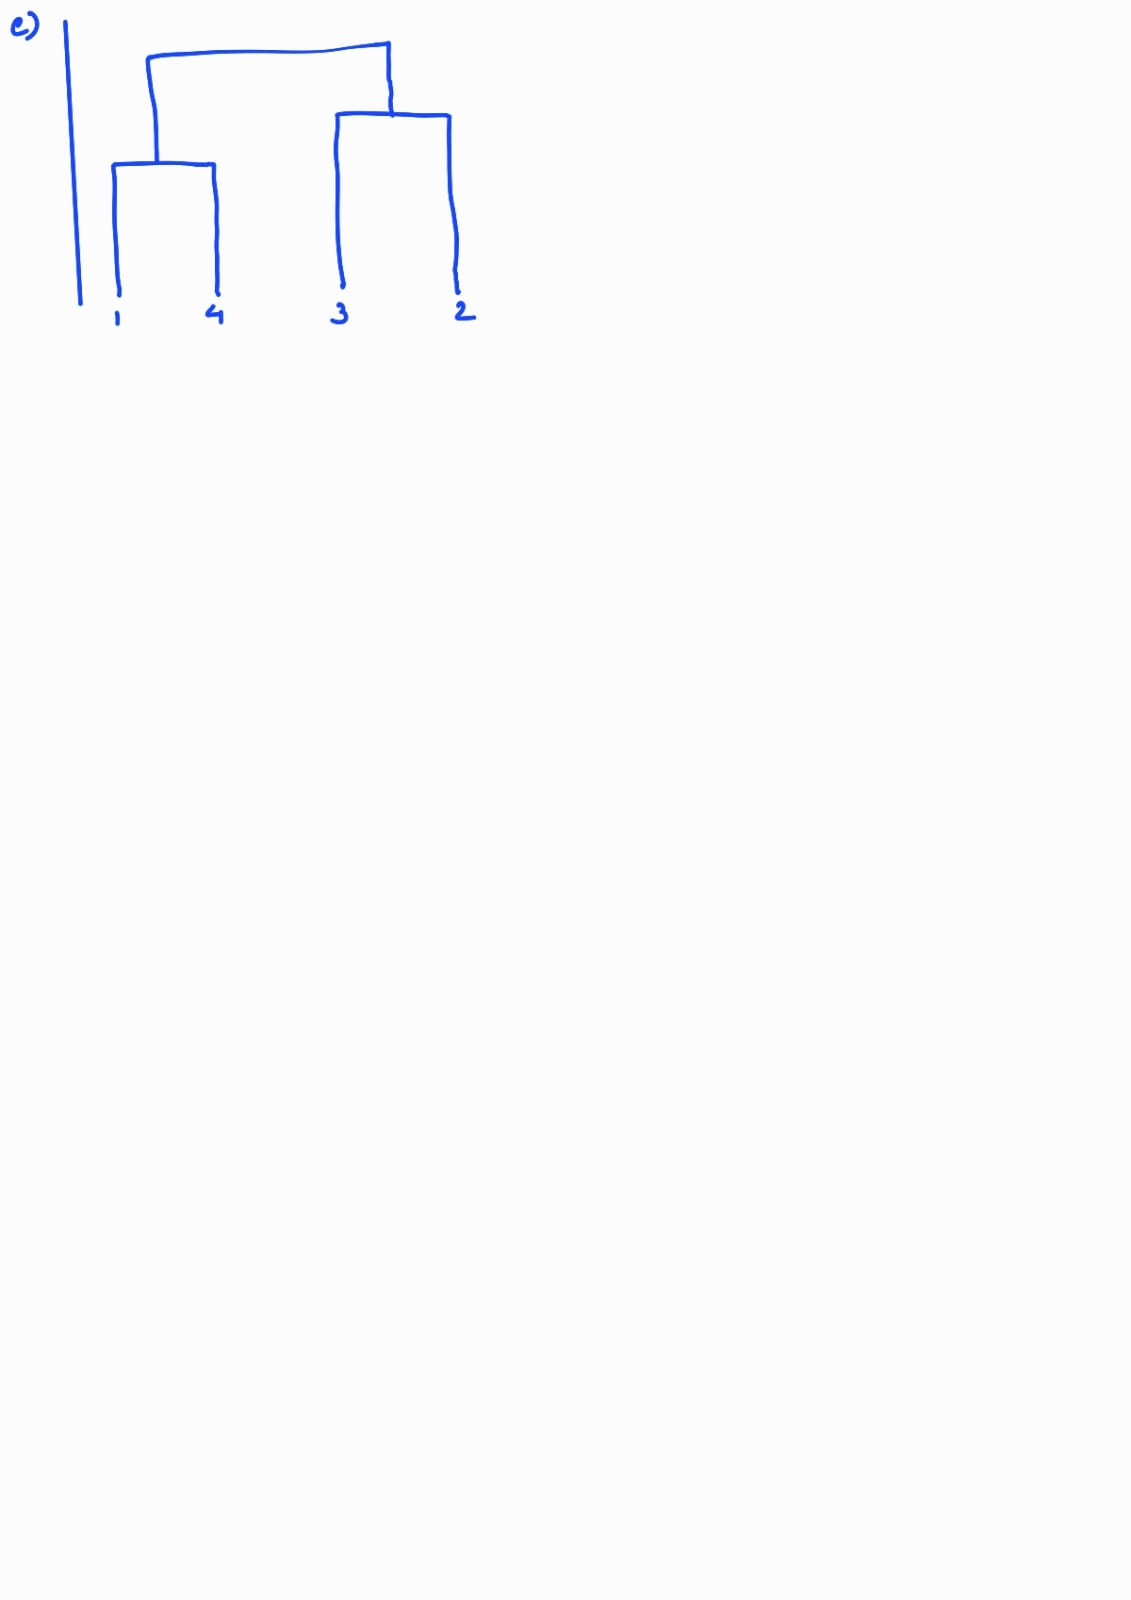